# Name: Jakir Husain Luhar
# Task2: Unsupervised learning using Kmean clustering


In [1]:
import matplotlib.pyplot as plt
import mglearn
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("Iris.csv")

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
l=list(set(data['Species']))
data['Species'].replace(l,(0,1,2),inplace=True)

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [6]:
colum=data.columns
colum=list(colum)
colum.remove('Id')
colum.remove('Species')

In [7]:
X=data.drop(['Id','Species'],axis=1)
y=data['Species']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6dccf06e50>,
      dtype=object)

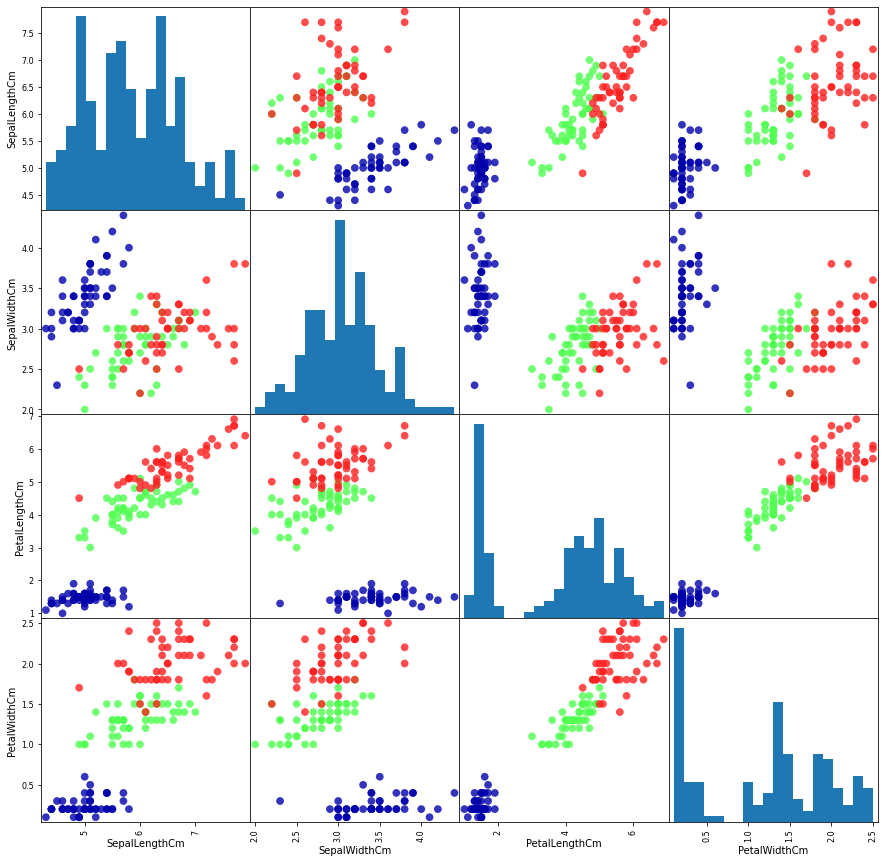

In [8]:
pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)

If we see here then it show 3 cluster is best for this data but for more accuracy we check it using elbow mathod

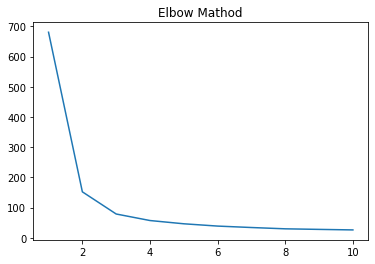

In [9]:
inr=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    inr.append(kmeans.inertia_)
plt.plot(range(1,11),inr)
plt.title("Elbow Mathod")
plt.show()

As we see that according to elbow mathod number of cluster is 3 here

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [11]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [12]:
print(kmeans.predict(X))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [13]:
X.columns


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [14]:
print("These are the possible combinations of feature:")
for i in range(len(X.columns)):
    for j in range(i+1,len(X.columns)):
        print(X.columns[i],"+",X.columns[j])

These are the possible combinations of feature:
SepalLengthCm + SepalWidthCm
SepalLengthCm + PetalLengthCm
SepalLengthCm + PetalWidthCm
SepalWidthCm + PetalLengthCm
SepalWidthCm + PetalWidthCm
PetalLengthCm + PetalWidthCm


Text(0, 0.5, 'PetalWidthCm')

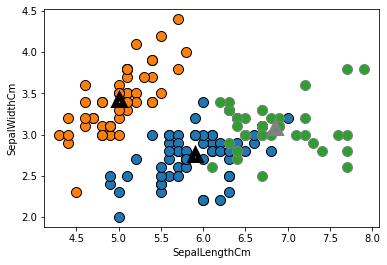

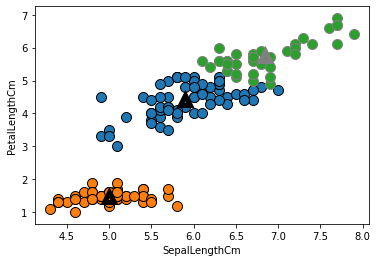

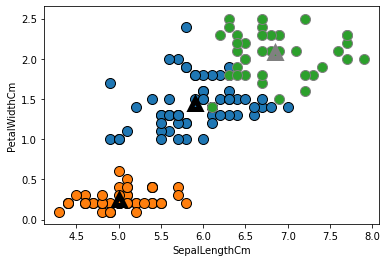

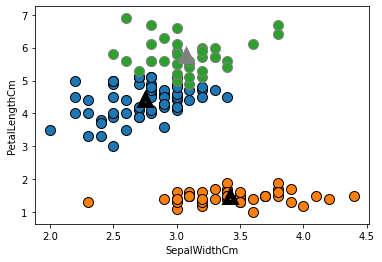

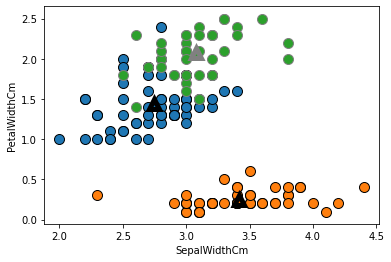

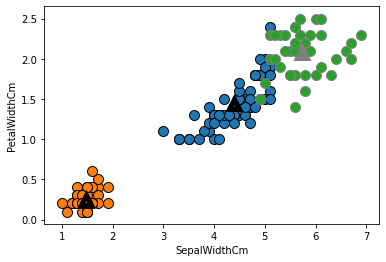

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.figure(1)
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0],
                         kmeans.cluster_centers_[:, 1], [0, 1, 2],
                         markers='^', markeredgewidth=5)
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")

plt.figure(2)
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 2], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0],
                         kmeans.cluster_centers_[:, 2], [0, 1, 2],
                         markers='^', markeredgewidth=5)
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")

plt.figure(3)
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 3], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0],
                         kmeans.cluster_centers_[:, 3], [0, 1, 2],
                         markers='^', markeredgewidth=5)
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalWidthCm")

plt.figure(4)
mglearn.discrete_scatter(X.iloc[:, 1], X.iloc[:, 2], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 1],
                         kmeans.cluster_centers_[:, 2], [0, 1, 2],
                         markers='^', markeredgewidth=5)
plt.xlabel("SepalWidthCm")
plt.ylabel("PetalLengthCm")

plt.figure(5)
mglearn.discrete_scatter(X.iloc[:, 1], X.iloc[:, 3], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 1],
                         kmeans.cluster_centers_[:, 3], [0, 1, 2],
                         markers='^', markeredgewidth=5)
plt.xlabel("SepalWidthCm")
plt.ylabel("PetalWidthCm")


plt.figure(6)
mglearn.discrete_scatter(X.iloc[:, 2], X.iloc[:, 3], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 2],
                         kmeans.cluster_centers_[:, 3], [0, 1, 2],
                         markers='^', markeredgewidth=5)
plt.xlabel("SepalWidthCm")
plt.ylabel("PetalWidthCm")
